<p align="center">
  <img src="./mne_logo.jpg" alt="image" width="50%" height="auto" />
</p>

# MNE-Python Workshop
Cutting EEG Conference                 
Presentation by: Sara Rostami, Alireza Mahdavi
***

## Useful Resources:
1. MNE's documentation: https://mne.tools/stable/index.html
2. MNE's Github: https://github.com/mne-tools
2. Neural Data Science in Python: https://neuraldatascience.io/7-eeg/mne_python.html

***

## Part 1: Preprocessing

### 1. Import libraries

- Install [MNE](https://mne.tools/stable/install/index.html)

In [1]:
# !pip install mne

In [21]:
# %matplotlib notebook
import mne
import matplotlib.pyplot as plt

fname = "oddball_example_small-fif.gz"

### 2. Read in raw data; raw objects

MNE is *object oriented*. Objects have corresponding methods. Check which by typing `raw.` and pressing TAB:

Aha! By default, MNE does not store raw and epochs objects in memory. you have to set the argument *"preload"* to True

In [3]:
raw = mne.io.read_raw_fif(fname, preload=True)

Opening raw data file oddball_example_small-fif.gz...


C:\Users\Sara Rostami.D\AppData\Local\Temp\ipykernel_13504\67999550.py:1: RuntimeWarning: This filename (oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fname, preload=True)


Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.
Reading 0 ... 109097  =      0.000 ...  1090.970 secs...


### Entire contents of the raw object

Accessing the dictionary containing all the attributes of the raw object

In [33]:
raw.__dict__

{'preload': True,
 '_last_samps': array([112000]),
 '_first_samps': array([2903]),
 'info': <Info | 10 non-empty values
  bads: []
  ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
  chs: 63 EEG, 1 Stimulus
  custom_ref_applied: True
  file_id: 4 items (dict)
  highpass: 0.1 Hz
  lowpass: 30.0 Hz
  meas_date: 2017-08-10 20:05:16 UTC
  meas_id: 4 items (dict)
  nchan: 64
  projs: []
  sfreq: 100.0 Hz
 >,
 'buffer_size_sec': 1.0,
 '_cals': array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
        0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
        0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
        0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
        0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1. , 1. ]),
 '_raw_extras': [{'ent': [<Tag | kind 300 - type 4 - size 25600 - next 0 - pos 7676 - data None>,
    <Tag | kind 300 - type 4 - size 25600 - next 0 - pos 33292 - data N

In [34]:
raw.filter?

Signature:
raw.filter(
    l_freq,
    h_freq,
    picks=None,
    filter_length='auto',
    l_trans_bandwidth='auto',
    h_trans_bandwidth='auto',
    n_jobs=1,
    method='fir',
    iir_params=None,
    phase='zero',
    fir_window='hamming',
    fir_design='firwin',
    skip_by_annotation=('edge', 'bad_acq_skip'),
    pad='reflect_limited',
    verbose=None,
)
Docstring:
Filter a subset of channels.

Parameters
----------

l_freq : float | None
    For FIR filters, the lower pass-band edge; for IIR filters, the lower
    cutoff frequency. If None the data are only low-passed.

h_freq : float | None
    For FIR filters, the upper pass-band edge; for IIR filters, the upper
    cutoff frequency. If None the data are only high-passed.
picks : str | list | slice | None
    Channels to include. Slices and lists of integers will be interpreted as channel indices. In lists, channel *type* strings
    (e.g., ``['meg', 'eeg']``) will pick channels of those
    types, channel *name* strings (

    raw.resample
    raw.filter
    raw.drop_channels
    ...

### 3. Bandpass filter

In [4]:
raw.filter(1, 20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 331 samples (3.310 sec)



<Raw | oddball_example_small-fif.gz, 64 x 109098 (1091.0 s), ~53.3 MB, data loaded>

### 4. Inspecting raw data ...

Opening raw-browser...


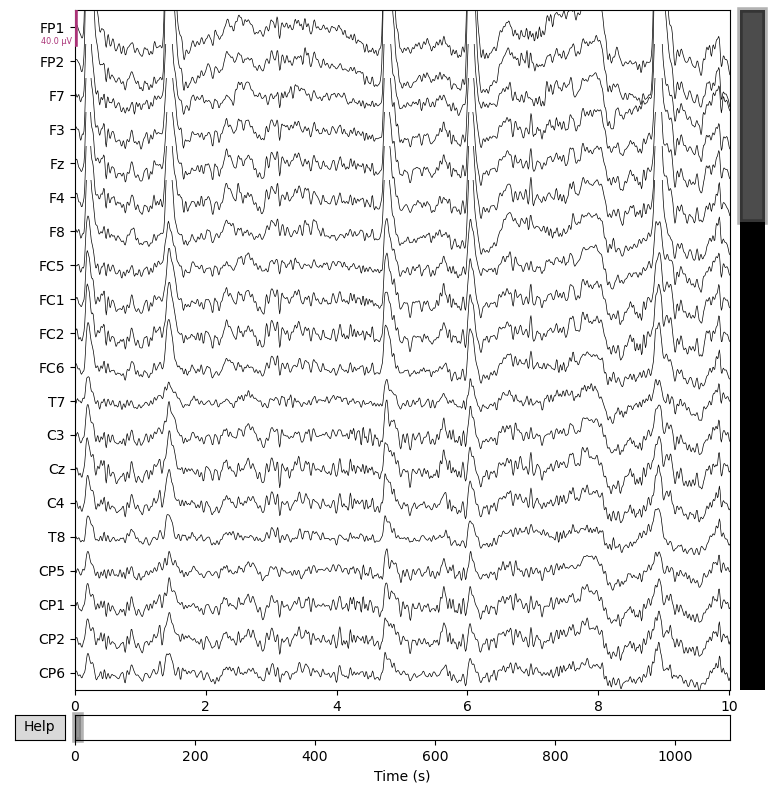

In [36]:
raw.plot();

As you see in the above figure, there are many eog artefacts. We will use ICA to correct these. For this, we create an ICA object
and use its `.fit` method on a filtered copy of the raw data:

### 5. Independent Component Analysis (ICA)

In [5]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [6]:
ica.fit(raw.copy().filter(8, 35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 165 samples (1.650 sec)



Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 9.6s.


Method,fastica
Fit,72 iterations on raw data (109098 samples)
ICA components,20
Explained variance,98.9 %
Available PCA components,63
Channel types,eeg
ICA components marked for exclusion,—


### Visualize ICs

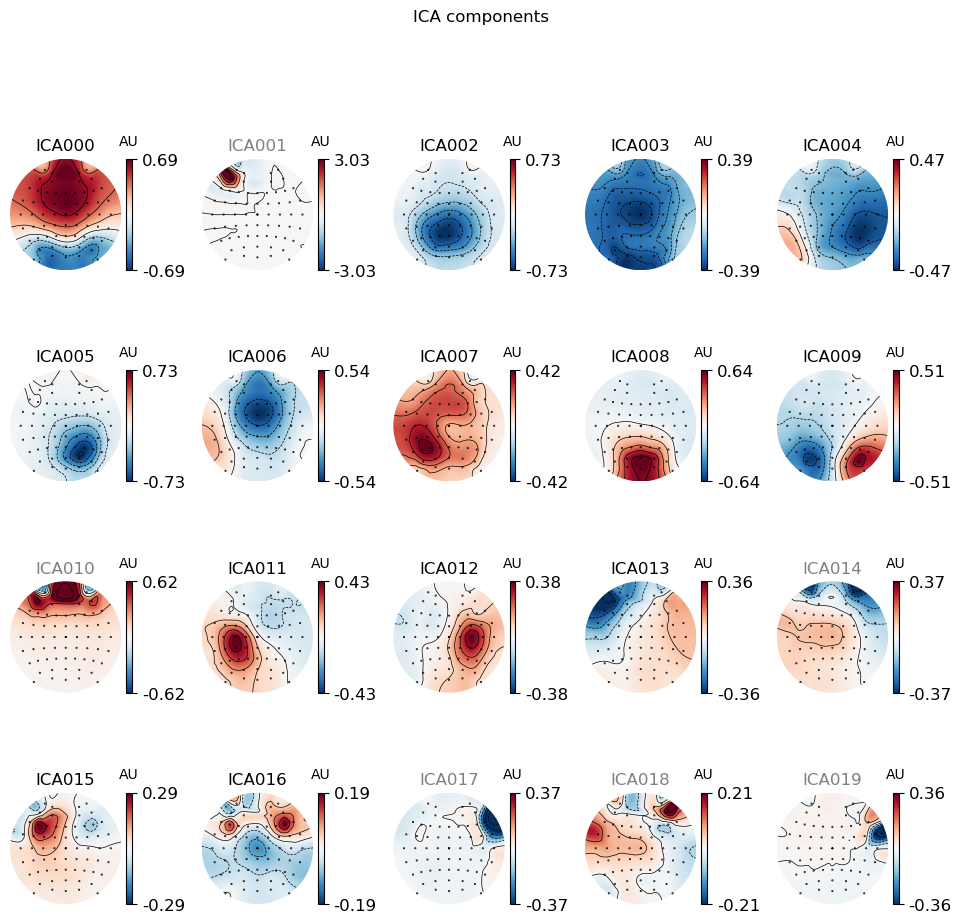

In [50]:
ica.plot_components(outlines="skirt",colorbar=True);

### Identifying Bad Channels by Visual Inspection

We store "bad" components in the ica object.

In [30]:
ica.exclude = [1, 10, 14, 17, 18, 19]

We could also use one of the automatic algorithms ...

### Identifying Bad Channels by the Automatic Algorithm

In [41]:
ica.find_bads_eog?

Signature:
ica.find_bads_eog(
    inst,
    ch_name=None,
    threshold=3.0,
    start=None,
    stop=None,
    l_freq=1,
    h_freq=10,
    reject_by_annotation=True,
    measure='zscore',
    verbose=None,
)
Docstring:
Detect EOG related components using correlation.

Detection is based on Pearson correlation between the
filtered data and the filtered EOG channel.
Thresholding is based on adaptive z-scoring. The above threshold
components will be masked and the z-score will be recomputed
until no supra-threshold component remains.

Parameters
----------
inst : instance of Raw, Epochs or Evoked
    Object to compute sources from.
ch_name : str
    The name of the channel to use for EOG peak detection.
    The argument is mandatory if the dataset contains no EOG
    channels.
threshold : float | str
    Value above which a feature is classified as outlier.

    - If ``measure`` is ``'zscore'``, defines the threshold on the
      z-score used in the iterative z-scoring method.
    - If 

In [33]:
bad_idx, scores = ica.find_bads_eog(raw, 'SO2', threshold=2)
print(bad_idx)

Using EOG channel: SO2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)


### comparing raw and corrected data after the above steps

Using matplotlib as 2D backend.
Opening raw-browser...


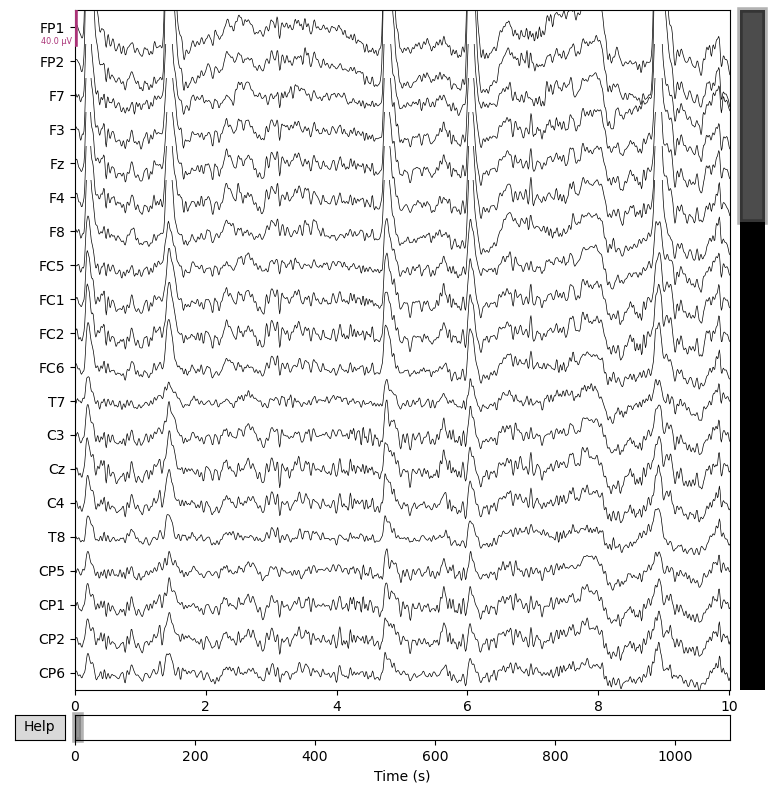

In [9]:
raw.plot();
# mne.viz.plot_raw(raw);

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


Opening raw-browser...


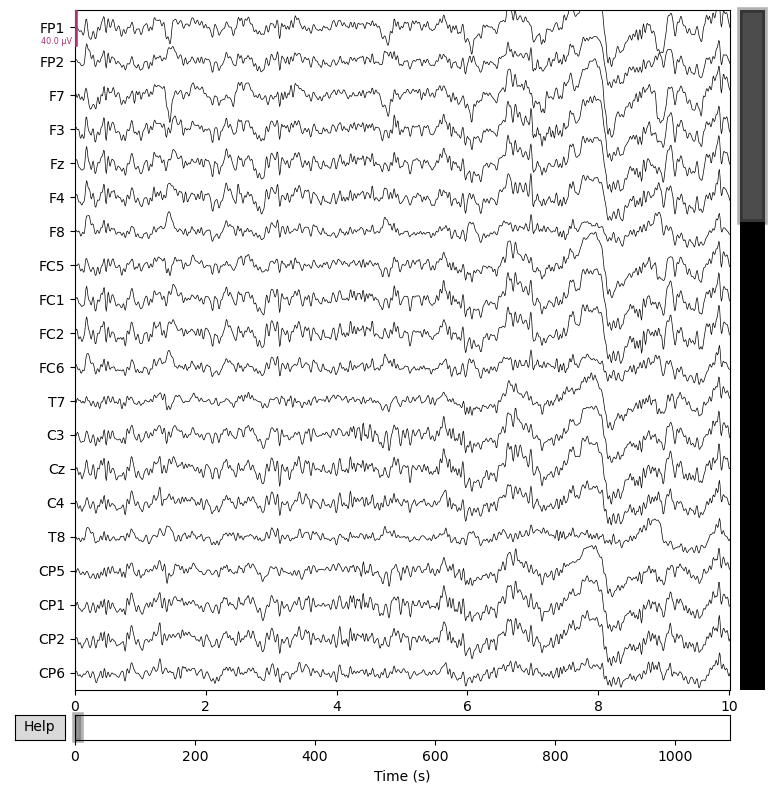

In [34]:
ica.apply(raw.copy(), exclude=ica.exclude).plot();

### 6. Epoching

For epoching the data, we need event markers. Usually, these are stored in the `raw` object;
in MNE, in a stimulus channel.

In [11]:
events = mne.find_events(raw)

903 events found
Event IDs: [100 200]


`events` is simply an array (time in samples, zero, trigger);

In [41]:
events

array([[  3241,      0,    200],
       [  3437,      0,    200],
       [  3643,      0,    200],
       ...,
       [111496,      0,    200],
       [111613,      0,    200],
       [111719,      0,    200]], dtype=int64)

... which we can visualize:

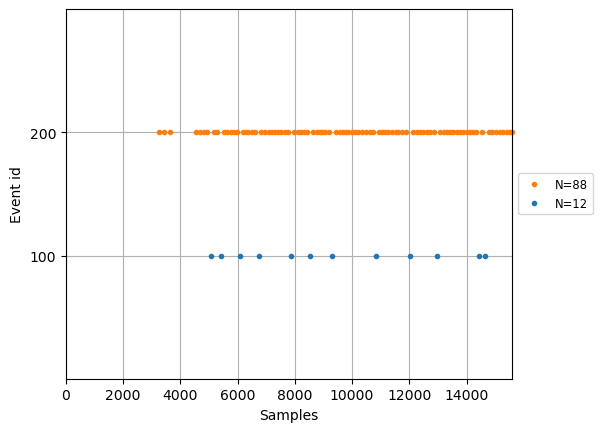

In [43]:
mne.viz.plot_events(events[:100]);

For creating an `mne.Epochs` object, we require, in addition to the `raw` object and the `events` array, a dictionary of the intended condition names and the corresponding trigger numbers.

In [48]:
mne.Epochs?

Init signature:
mne.Epochs(
    raw,
    events,
    event_id=None,
    tmin=-0.2,
    tmax=0.5,
    baseline=(None, 0),
    picks=None,
    preload=False,
    reject=None,
    flat=None,
    proj=True,
    decim=1,
    reject_tmin=None,
    reject_tmax=None,
    detrend=None,
    on_missing='raise',
    reject_by_annotation=True,
    metadata=None,
    event_repeated='error',
    verbose=None,
)
Docstring:     
Epochs extracted from a Raw instance.

Parameters
----------

raw : Raw object
    An instance of `~mne.io.Raw`.

events : array of int, shape (n_events, 3)
    The array of :term:`events`. The first column contains the event time in
    samples, with :term:`first_samp` included. The third column contains the
    event id.
    If some events don't match the events of interest as specified by event_id,
    they will be marked as ``IGNORED`` in the drop log.

event_id : int | list of int | dict | None
    The id of the :term:`events` to consider. If dict, the keys can later be
  

The default tmin and tmax for epoching is -0.2 and 0.5 respectively

In [14]:
event_ids = {"standard/stimulus": 200, "target/stimulus": 100}

epochs = mne.Epochs(raw, events, event_id=event_ids, preload= True)

Not setting metadata
903 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 903 events and 71 original time points ...


0 bad epochs dropped


### Visualizing Epoched Data

Opening epochs-browser...


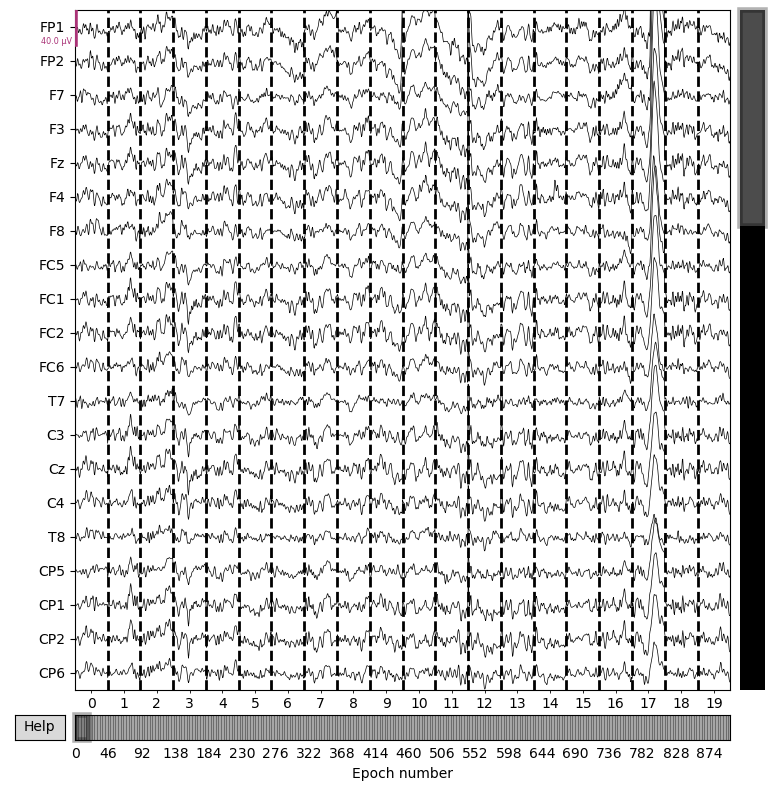

In [22]:
epochs.plot();

In [15]:
epochs = ica.apply(epochs, exclude=ica.exclude)

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components


C:\Users\Sara Rostami.D\AppData\Local\Temp\ipykernel_13504\3077353632.py:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs, exclude=ica.exclude)


Of course ...

In [16]:
epochs = mne.Epochs(raw, events, event_id=event_ids, preload=True)
epochs = ica.apply(epochs, exclude=ica.exclude)

Not setting metadata
903 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 903 events and 71 original time points ...


0 bad epochs dropped
Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components


C:\Users\Sara Rostami.D\AppData\Local\Temp\ipykernel_13504\930629000.py:2: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs, exclude=ica.exclude)


The `mne.Epochs` constructor has a number of options, such as time window lengths and rejection thresholds.
Investigate them on your own.

## Baseline Correction

<details>
<summary>
<span style="color:red;"><b>Q: </span> <span style="color:yellow;"> Why is baseline correction necessary, and how does it improve the analysis of EEG data?</b> </span>
</summary>
<br>
Baseline correction is essential because it eliminates the influence of the ongoing brain activity present before the event of interest. By subtracting the baseline activity, researchers can focus specifically on changes in neural activity related to the event. Without baseline correction, the EEG signal might include both event-related changes and ongoing brain activity, making it challenging to distinguish between the two.
</details>

`Epochs` objects also have various methods, different from `raw` objects - e.g., for baselining.

In [17]:
epochs.apply_baseline((None, 0))

Applying baseline correction (mode: mean)


Number of events,903
Events,standard/stimulus: 797target/stimulus: 106
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


... and many more ...

To subselect only a sample of epochs, a dict-like access mode is available.

In [18]:
epochs["target"]

Number of events,106
Events,target/stimulus: 106
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


Observe how tags selected by forward slashes - "/" - work.

In [45]:
epochs["standard"]

Number of events,797
Events,standard/stimulus: 797
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


How does the epoched activity look like?

In [44]:
epochs["stimulus"]

Number of events,903
Events,standard/stimulus: 797target/stimulus: 106
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


### Information about the epoched data

In [56]:
epochs.info

<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG, 1 Stimulus
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 20.0 Hz
 meas_date: 2017-08-10 20:05:16 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 100.0 Hz
>

### 7. Plot Event Related Potential (ERP)

<details>
<summary>
<span style="color:red;"><b>Q: </span> <span style="color:yellow;"> What are some commonly studied ERP components, and what cognitive functions are associated with them?</b> </span>
</summary>
<br>
Event-Related Potentials (ERPs) are specific patterns of neural electrical activity in the brain, time-locked to sensory, cognitive, or motor events. Common ERP components include <b>N1</b>, <b>P1</b>, <b>N2</b>, <b>P2</b>, <b>N400</b>, and <b>P300</b>, each reflecting different cognitive functions. <b>N1 (+100 ms)</b> and <b>P1 (+100 ms)</b> are associated with early visual processing and attentional modulation, while <b>N2 (+200-300)</b> is linked to conflict monitoring and response inhibition. <b>P2 (+200-300)</b> is involved in semantic processing and categorization, and <b>N400 (+ 400 ms)</b> is crucial for language comprehension and contextual integration. <b>P300 (+ 300-500 ms)</b> reflects attention allocation, novelty detection, and working memory updating.
</details>

In [57]:
epochs.plot_image?

Signature:
epochs.plot_image(
    picks=None,
    sigma=0.0,
    vmin=None,
    vmax=None,
    colorbar=True,
    order=None,
    show=True,
    units=None,
    scalings=None,
    cmap=None,
    fig=None,
    axes=None,
    overlay_times=None,
    combine=None,
    group_by=None,
    evoked=True,
    ts_args=None,
    title=None,
    clear=False,
)
Docstring:
Plot Event Related Potential / Fields image.

Parameters
----------
picks : str | list | slice | None
    Channels to include. Slices and lists of integers will be interpreted as channel indices. In lists, channel *type* strings
    (e.g., ``['meg', 'eeg']``) will pick channels of those
    types, channel *name* strings (e.g., ``['MEG0111', 'MEG2623']``
    will pick the given channels. Can also be the string values
    "all" to pick all channels, or "data" to pick :term:`data channels`.
    None (default) will pick good data channels. Note that channels in ``info['bads']`` *will be included* if their names or indices are explicit

Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


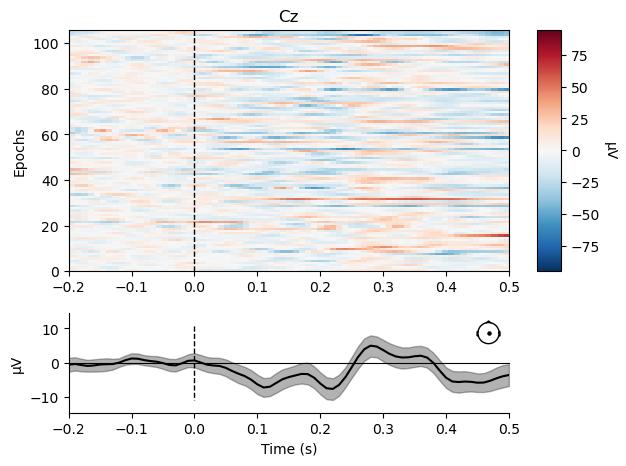

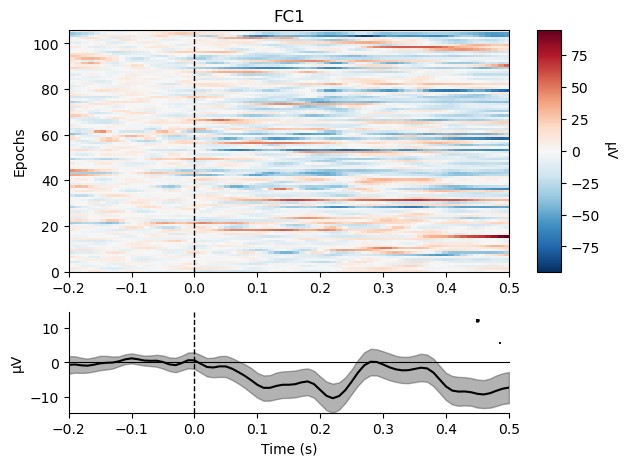

In [58]:
epochs["target"].plot_image(picks=[13,8]);

To ensure we have as many Oddball as Standard trials, we can run ...

In [59]:
epochs.equalize_event_counts(event_ids)
epochs

Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 248, 249, 252, 253, 254, 257, 260, 261, 262, 263, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280,

Number of events,212
Events,standard/stimulus: 106target/stimulus: 106
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


### 8. Save the epoched Data to Disk

In [ ]:
epochs.save("oddball-epo.fif",)  # remember, the data has been cleaned of bad ICs

If we need longer Epoches, we can set the tmin and tmax, instead of using the default values (-0.2,0.5 sec)

In [60]:
epochs_for_tfr = mne.Epochs(raw, events, event_id=event_ids,
                            tmin=-.5, tmax=1.5, preload=True)  # need longer data segment

Not setting metadata
903 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 903 events and 201 original time points ...
0 bad epochs dropped


Opening epochs-browser...


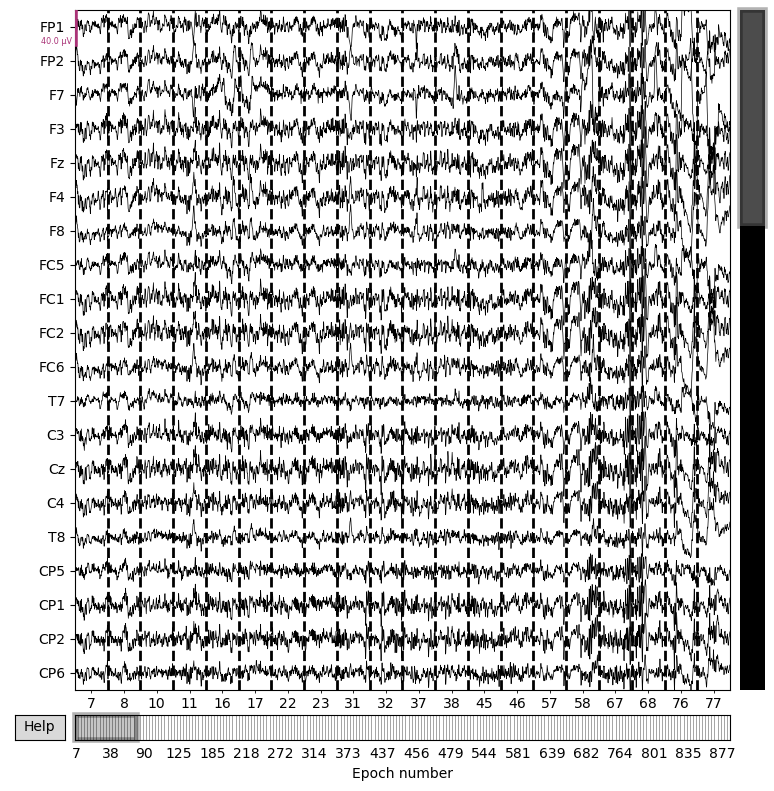

In [63]:
epochs_for_tfr.plot();

In [66]:
epochs_for_tfr = ica.apply(epochs_for_tfr, exclude=ica.exclude)
epochs_for_tfr.equalize_event_counts(event_ids);  # to speed up things
epochs_for_tfr.save("oddball-long-epo.fif",overwrite=True);

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components
Dropped 0 epochs: 
Overwriting existing file.


C:\Users\Sara Rostami.D\AppData\Local\Temp\ipykernel_35784\2792163137.py:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs_for_tfr = ica.apply(epochs_for_tfr, exclude=ica.exclude)


If you want, you get the data in numpy array format...

In [46]:
epochs.get_data?

Signature: epochs.get_data(picks=None, item=None, units=None, tmin=None, tmax=None)
Docstring:
Get all epochs as a 3D array.

Parameters
----------
picks : str | list | slice | None
    Channels to include. Slices and lists of integers will be interpreted as channel indices. In lists, channel *type* strings
    (e.g., ``['meg', 'eeg']``) will pick channels of those
    types, channel *name* strings (e.g., ``['MEG0111', 'MEG2623']``
    will pick the given channels. Can also be the string values
    "all" to pick all channels, or "data" to pick :term:`data channels`.
    None (default) will pick all channels. Note that channels in ``info['bads']`` *will be included* if their names or indices are explicitly provided.
item : slice | array-like | str | list | None
    The items to get. See :meth:`mne.Epochs.__getitem__` for
    a description of valid options. This can be substantially faster
    for obtaining an ndarray than :meth:`~mne.Epochs.__getitem__`
    for repeated access on large 

In [67]:
X = epochs.get_data()
type(X)

numpy.ndarray

(trials, channels, timepoints)

In [68]:
X.shape

(212, 64, 71)

If you want to extract only the target trials...

In [69]:
epochs['target'].get_data().shape

(106, 64, 71)

## Main Resource:
- https://github.com/jona-sassenhagen/mne_workshop_amsterdam